In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.legend_handler import HandlerLine2D
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
f1_score, matthews_corrcoef, mean_squared_error, roc_curve, auc
sb.set() # set the default Seaborn style for graphics

In [2]:
cardio_raw = pd.read_csv('cardio.csv')
cardio_raw.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,M,168,62.0,22.0,110,80,N,N,0,0,1,0
1,1,55,F,156,85.0,34.9,140,90,H,N,0,0,1,1
2,2,52,F,165,64.0,23.5,130,70,H,N,0,0,0,1
3,3,48,M,169,82.0,28.7,150,100,N,N,0,0,1,1
4,4,48,F,156,56.0,23.0,100,60,N,N,0,0,0,0


# -----------Enter our problem definition based on dataset---------

In [3]:
print("Data type : ", type(cardio_raw))
print("Data dims : ", cardio_raw.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (70000, 14)


In [4]:
cardio_raw.describe() 

,id,Age,Height,Weight,BMI,AP_HI,AP_LO,Smoke,Alco,Active,Cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,164.359229,74.205690,27.555604,128.817286,96.630414,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,8.210126,14.395757,6.092759,154.011419,188.472530,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,55.000000,10.000000,3.500000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,159.000000,65.000000,23.900000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,165.000000,72.000000,26.400000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,170.000000,82.000000,30.200000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,250.000000,200.000000,298.700000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
cardio_raw.corr()

,id,Age,Height,Weight,BMI,AP_HI,AP_LO,Smoke,Alco,Active,Cardio
id,1.000000,0.003050,-0.003038,-0.001830,-0.001364,0.003356,-0.002529,-0.003699,0.001210,0.003755,0.003799
Age,0.003050,1.000000,-0.081456,0.053661,0.085423,0.020793,0.017754,-0.047884,-0.029918,-0.009819,0.237749
Height,-0.003038,-0.081456,1.000000,0.290968,-0.290363,0.005488,0.006150,0.187989,0.094419,-0.006570,-0.010821
Weight,-0.001830,0.053661,0.290968,1.000000,0.762151,0.030702,0.043710,0.067780,0.067113,-0.016867,0.181660
BMI,-0.001364,0.085423,-0.290363,0.762151,1.000000,0.024861,0.035350,-0.027165,0.014396,-0.014271,0.165646
AP_HI,0.003356,0.020793,0.005488,0.030702,0.024861,1.000000,0.016086,-0.000922,0.001408,-0.000033,0.054475
AP_LO,-0.002529,0.017754,0.006150,0.043710,0.035350,0.016086,1.000000,0.005186,0.010601,0.004780,0.065719
Smoke,-0.003699,-0.047884,0.187989,0.067780,-0.027165,-0.000922,0.005186,1.000000,0.340094,0.025858,-0.015486
Alco,0.001210,-0.029918,0.094419,0.067113,0.014396,0.001408,0.010601,0.340094,1.000000,0.025476,-0.007330
Active,0.003755,-0.009819,-0.006570,-0.016867,-0.014271,-0.000033,0.004780,0.025858,0.025476,1.000000,-0.035653


In [6]:
cardio_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      70000 non-null  int64  
 1   Age     70000 non-null  int64  
 2   Gender  70000 non-null  object 
 3   Height  70000 non-null  int64  
 4   Weight  70000 non-null  float64
 5   BMI     70000 non-null  float64
 6   AP_HI   70000 non-null  int64  
 7   AP_LO   70000 non-null  int64  
 8   Chol    70000 non-null  object 
 9   Gluc    70000 non-null  object 
 10  Smoke   70000 non-null  int64  
 11  Alco    70000 non-null  int64  
 12  Active  70000 non-null  int64  
 13  Cardio  70000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 7.5+ MB


## Numerical variables EDA and Visualization ( Before cleaning )

In [7]:
# get all numeric data
num_DF = pd.DataFrame(cardio_raw[['Age', 'Height', 'Weight', 'BMI', 'AP_HI', 'AP_LO']])
num_DF.head()

,Age,Height,Weight,BMI,AP_HI,AP_LO
0,50,168,62.0,22.0,110,80
1,55,156,85.0,34.9,140,90
2,52,165,64.0,23.5,130,70
3,48,169,82.0,28.7,150,100
4,48,156,56.0,23.0,100,60


In [8]:
num_DF.describe()

,Age,Height,Weight,BMI,AP_HI,AP_LO
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,164.359229,74.205690,27.555604,128.817286,96.630414
std,6.765294,8.210126,14.395757,6.092759,154.011419,188.472530
min,30.000000,55.000000,10.000000,3.500000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,23.900000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,26.400000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,30.200000,140.000000,90.000000
max,65.000000,250.000000,200.000000,298.700000,16020.000000,11000.000000


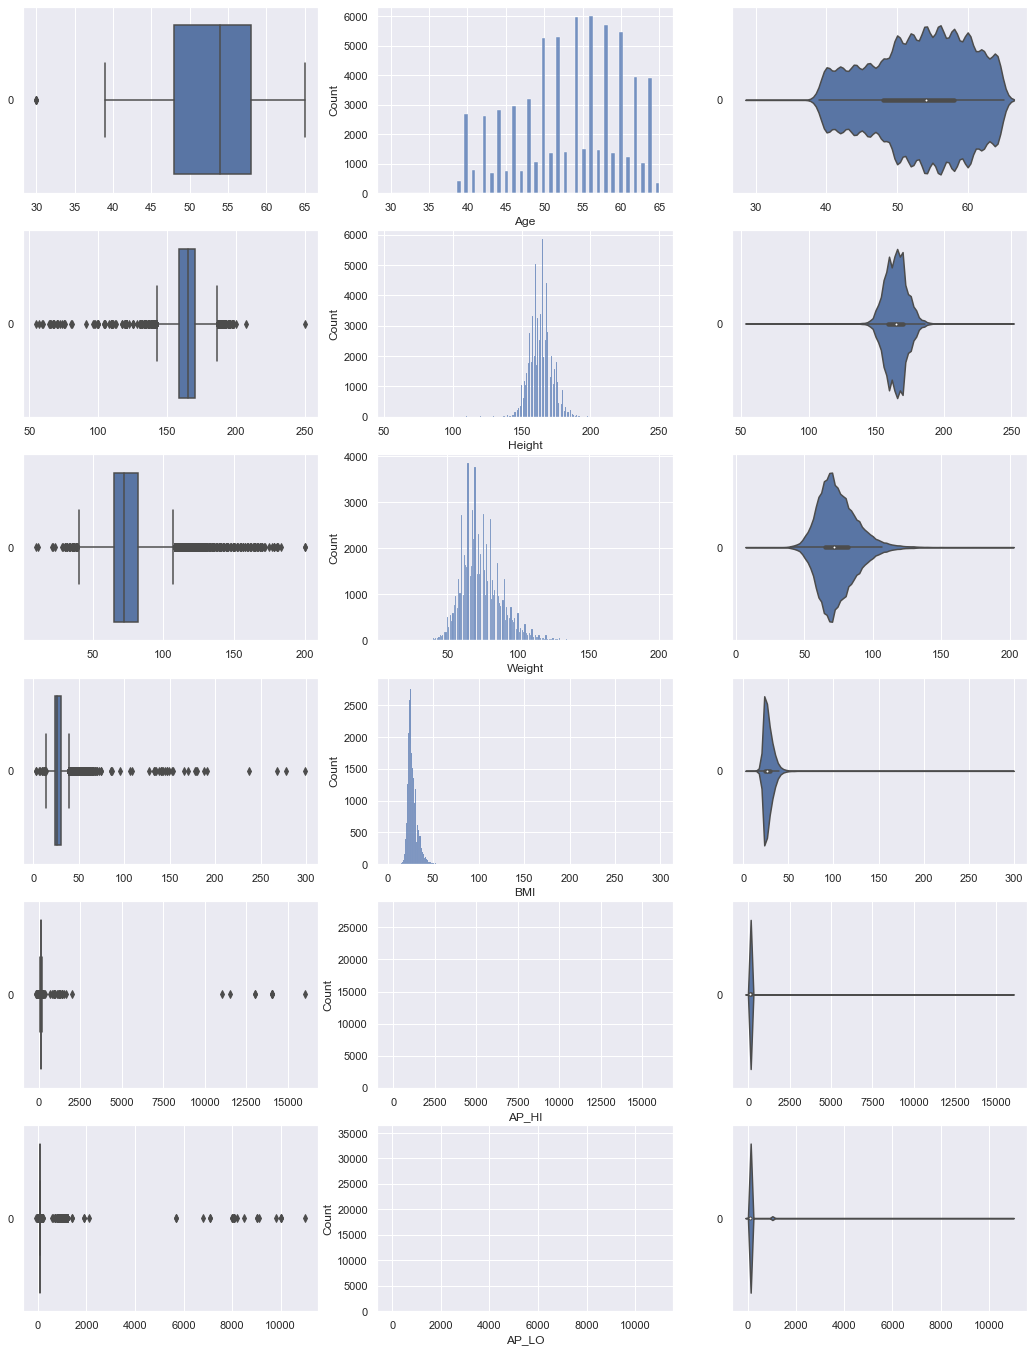

In [9]:
#visualization before data cleaning
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in num_DF:
    sb.boxplot(data = num_DF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = num_DF[var], ax = axes[count,1])
    sb.violinplot(data = num_DF[var], orient = "h", ax = axes[count,2])
    count += 1

<AxesSubplot:>

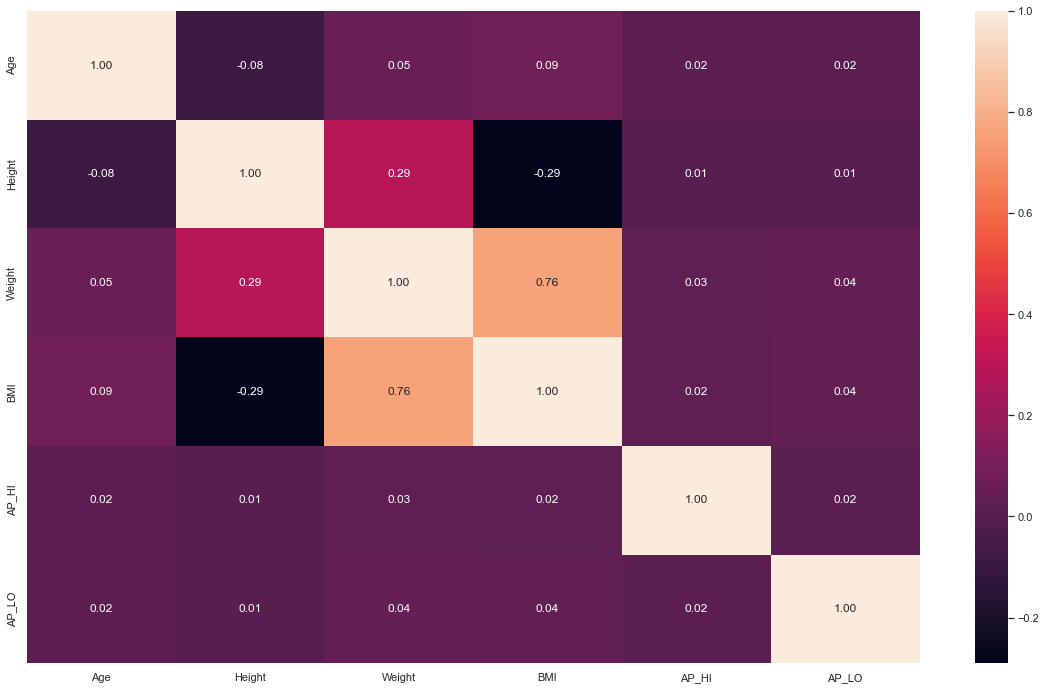

In [10]:
f = plt.figure(figsize=(20, 12))
sb.heatmap(num_DF.corr(), annot = True, fmt = ".2f")

In [11]:
num_DF.corr()

,Age,Height,Weight,BMI,AP_HI,AP_LO
Age,1.000000,-0.081456,0.053661,0.085423,0.020793,0.017754
Height,-0.081456,1.000000,0.290968,-0.290363,0.005488,0.006150
Weight,0.053661,0.290968,1.000000,0.762151,0.030702,0.043710
BMI,0.085423,-0.290363,0.762151,1.000000,0.024861,0.035350
AP_HI,0.020793,0.005488,0.030702,0.024861,1.000000,0.016086
AP_LO,0.017754,0.006150,0.043710,0.035350,0.016086,1.000000


In [12]:
num_DF.skew()

Age       -0.306444
Height    -0.642187
Weight     1.012070
BMI        7.725821
AP_HI     85.296214
AP_LO     32.114083
dtype: float64

## Categorical variables EDA and Visualization ( Before cleaning )

In [13]:
# categorical columns
cat_DF = pd.DataFrame(cardio_raw[['Gender', 'Chol', 'Gluc', 'Smoke', 'Alco', 'Active', 'Cardio']])
cat_DF.head()

,Gender,Chol,Gluc,Smoke,Alco,Active,Cardio
0,M,N,N,0,0,1,0
1,F,H,N,0,0,1,1
2,F,H,N,0,0,0,1
3,M,N,N,0,0,1,1
4,F,N,N,0,0,0,0


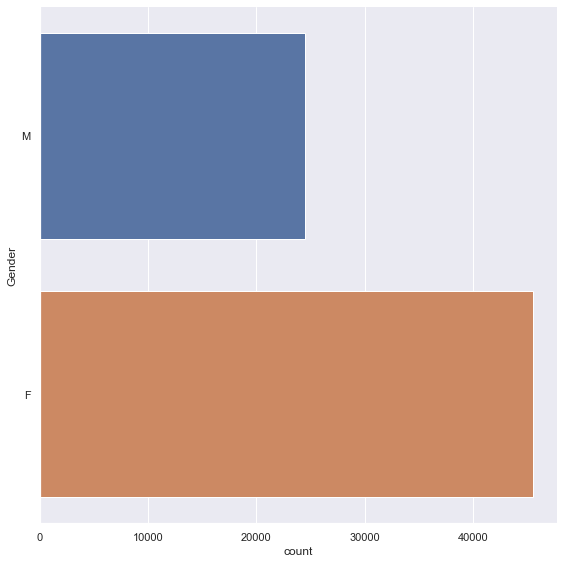

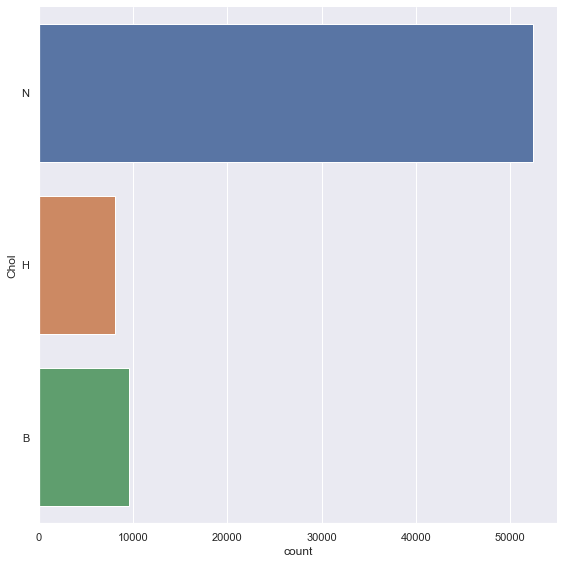

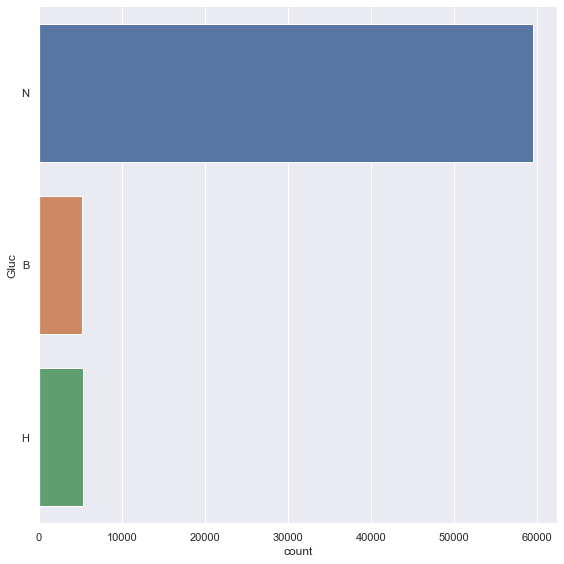

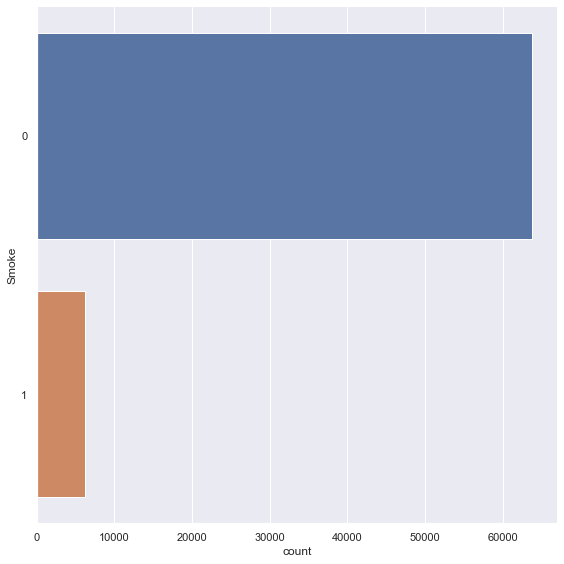

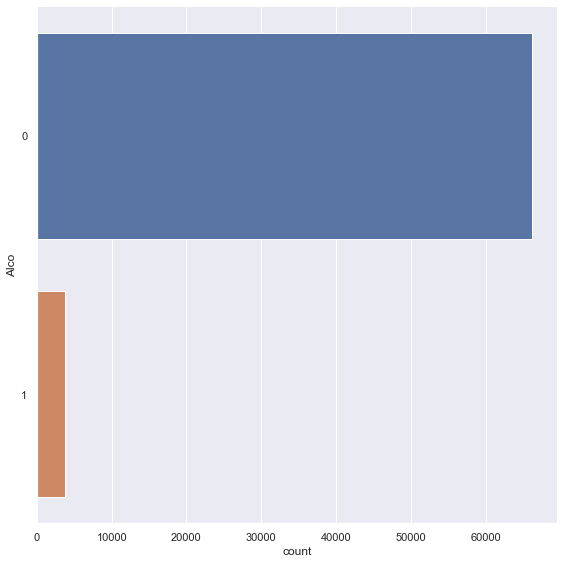

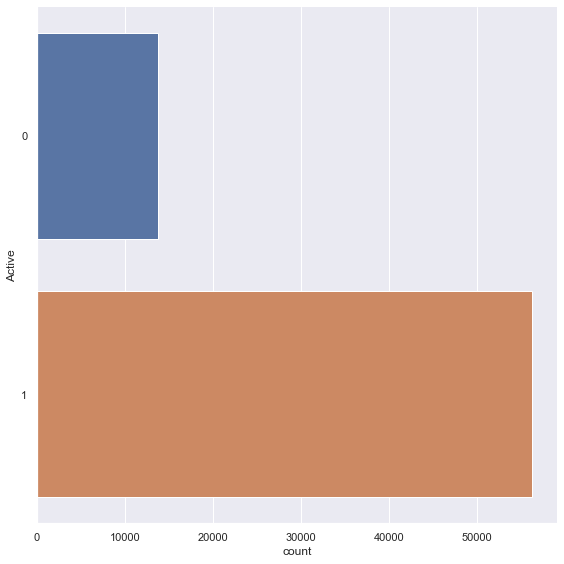

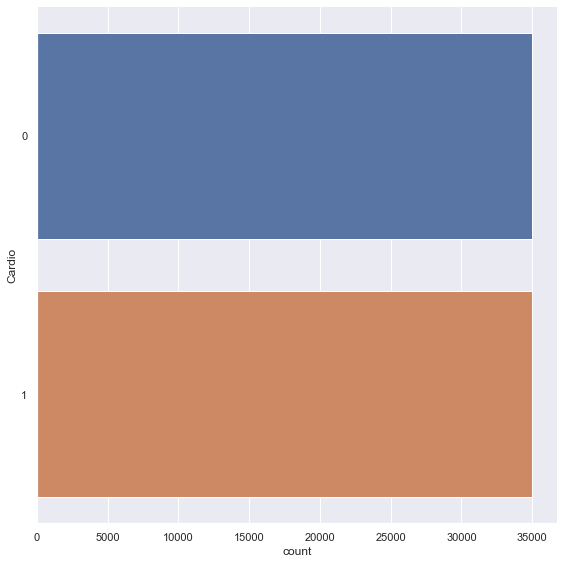

In [14]:
# cat plots
for var in cat_DF:
    sb.catplot(y = var, data = cat_DF, kind = "count", height = 8)

In [15]:
#change categorical to numeric

cat_DF['Chol']=cat_DF['Chol'].replace(['N','B','H'],[0,1,2]) 
cat_DF['Gluc']=cat_DF['Gluc'].replace(['N','B','H'],[0,1,2])
cat_DF['Gender']=cat_DF['Gender'].replace(['M','F'],[0,1])

<AxesSubplot:>

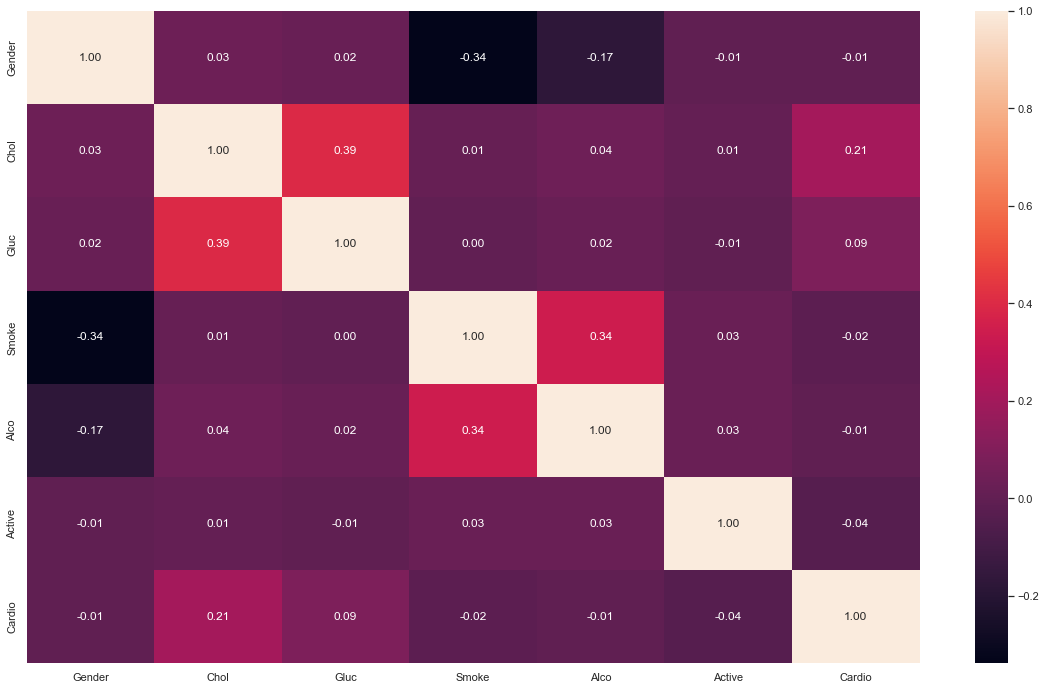

In [16]:
# using phi coefficient ( for categorical variables )
#heatmap for kendall corr for categorical 
variablesf = mp.pyplot.figure(figsize=(20, 12))
sb.heatmap(cat_DF.corr(method='kendall'), annot = True, fmt = ".2f")

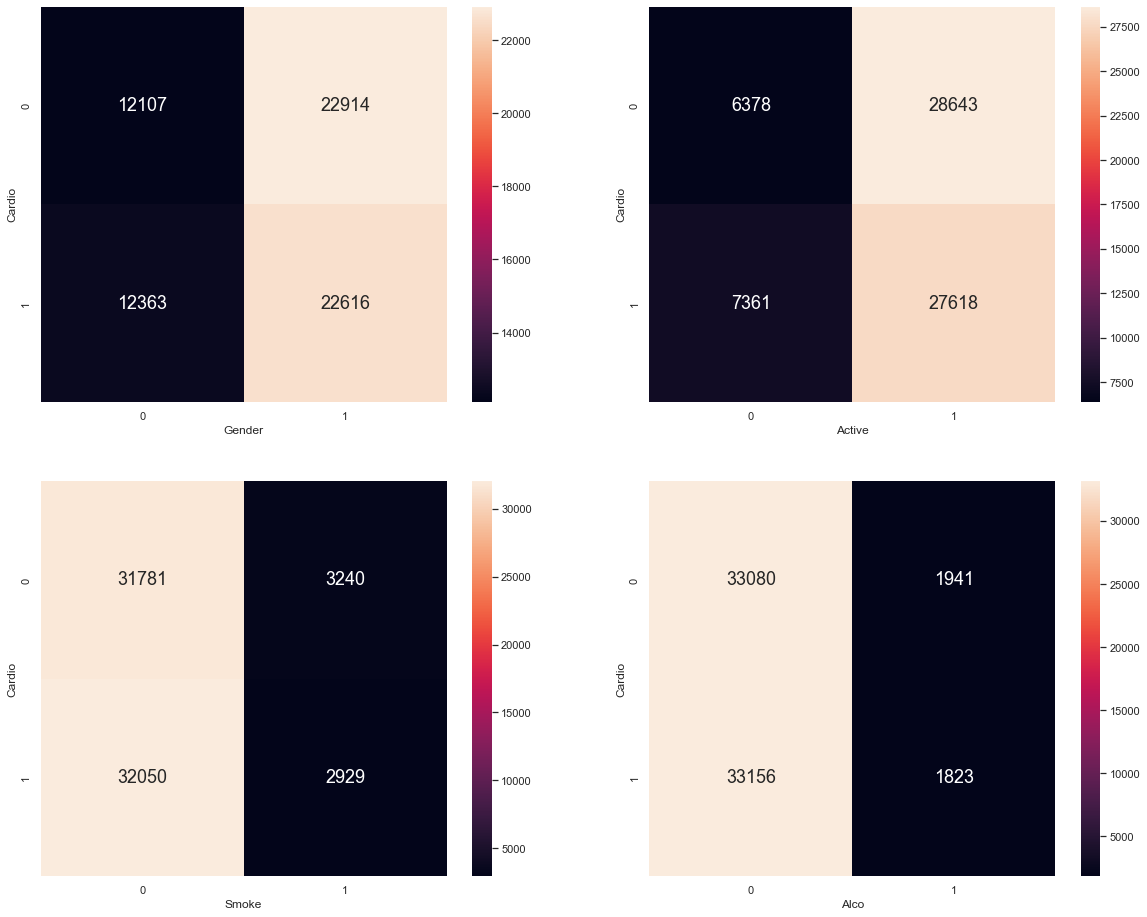

In [17]:
# looking at the binary variables distribution
f, axes = mp.pyplot.subplots(2, 2, figsize=(20, 16), )

cm_gender = confusion_matrix(cat_DF["Cardio"], cat_DF["Gender"])
cm_smoke = confusion_matrix(cat_DF["Cardio"], cat_DF["Smoke"])
cm_alco = confusion_matrix(cat_DF["Cardio"], cat_DF["Alco"])
cm_active = confusion_matrix(cat_DF["Cardio"], cat_DF["Active"])

sb.heatmap(cm_gender, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][0])
sb.heatmap(cm_active, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][1])
sb.heatmap(cm_smoke, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][0])
sb.heatmap(cm_alco, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][1])

count = 0
for ax in axes.flat:
    ax.set(ylabel = 'Cardio')
    if count == 0:
        ax.set(xlabel = 'Gender')
    elif count == 1:
        ax.set(xlabel = 'Active')
    elif count == 2:
        ax.set(xlabel = 'Smoke')
    elif count == 3:
        ax.set(xlabel = 'Alco')   
    count+=1

In [18]:
print("Percentage of Male with Cardio disease: ", round(100 * cm_gender[1][0]/(cm_gender[0][0] + cm_gender[1][0]),1))
print("Percentage of Female with Cardio disease: ", round(100 * cm_gender[1][1]/(cm_gender[0][1] + cm_gender[1][1]),1))
print("Percentage of non-Active with Cardio disease: ", round(100 * cm_active[1][0]/(cm_active[0][0] + cm_active[1][0]),1))
print("Percentage of Active with Cardio disease: ", round(100 * cm_active[1][1]/(cm_active[0][1] + cm_active[1][1]),1))
print("Percentage of non-Smoker with Cardio disease: ", round(100 * cm_smoke[1][0]/(cm_smoke[0][0] + cm_smoke[1][0]),1))
print("Percentage of Smoker with Cardio disease: ", round(100 * cm_smoke[1][1]/(cm_smoke[0][1] + cm_smoke[1][1]),1))
print("Percentage of non-Alcohol with Cardio disease: ", round(100 * cm_alco[1][0]/(cm_alco[0][0] + cm_alco[1][0]),1))
print("Percentage of Alcohol with Cardio disease: ", round(100 * cm_alco[1][1]/(cm_alco[0][1] + cm_alco[1][1]),1))

Percentage of Male with Cardio disease:  50.5
Percentage of Female with Cardio disease:  49.7
Percentage of non-Active with Cardio disease:  53.6
Percentage of Active with Cardio disease:  49.1
Percentage of non-Smoker with Cardio disease:  50.2
Percentage of Smoker with Cardio disease:  47.5
Percentage of non-Alcohol with Cardio disease:  50.1
Percentage of Alcohol with Cardio disease:  48.4


#  Using Box-Whisker to detect and remove outliers.

In [19]:
def remove_boxliers(df, li):
    
    dup = df
    q_low = []
    q_high = []
    
    for i in li:
        # print(i)
        #print(df[i])
        q1 = dup[i].quantile(0.25)
        q3 = dup[i].quantile(0.75)
        iqr = q3 - q1
        low_lim = q1 - 1.5 * iqr
        upp_lim = q3 + 1.5 * iqr
        q_low.append(low_lim)
        q_high.append(upp_lim)
    
    #print(q_low)
    #print(q_high)
    n = 0
    for i in li:
        df = df[ (df[i] > q_low[n]) & (df[i] < q_high[n]) ]
        n += 1
        
    return df

In [20]:
cardio_clean = remove_boxliers(cardio_raw, ['BMI', 'AP_LO', 'AP_HI'])
cardio_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61979 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      61979 non-null  int64  
 1   Age     61979 non-null  int64  
 2   Gender  61979 non-null  object 
 3   Height  61979 non-null  int64  
 4   Weight  61979 non-null  float64
 5   BMI     61979 non-null  float64
 6   AP_HI   61979 non-null  int64  
 7   AP_LO   61979 non-null  int64  
 8   Chol    61979 non-null  object 
 9   Gluc    61979 non-null  object 
 10  Smoke   61979 non-null  int64  
 11  Alco    61979 non-null  int64  
 12  Active  61979 non-null  int64  
 13  Cardio  61979 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 7.1+ MB


In [21]:
num_DF = cardio_clean[['Age', 'Height', 'Weight', 'BMI', 'AP_HI', 'AP_LO']]
num_DF.info()
print()
num_DF.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61979 entries, 0 to 69999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     61979 non-null  int64  
 1   Height  61979 non-null  int64  
 2   Weight  61979 non-null  float64
 3   BMI     61979 non-null  float64
 4   AP_HI   61979 non-null  int64  
 5   AP_LO   61979 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 3.3 MB



,Age,Height,Weight,BMI,AP_HI,AP_LO
0,50,168,62.0,22.0,110,80
1,55,156,85.0,34.9,140,90
2,52,165,64.0,23.5,130,70
3,48,169,82.0,28.7,150,100
5,60,151,67.0,29.4,120,80


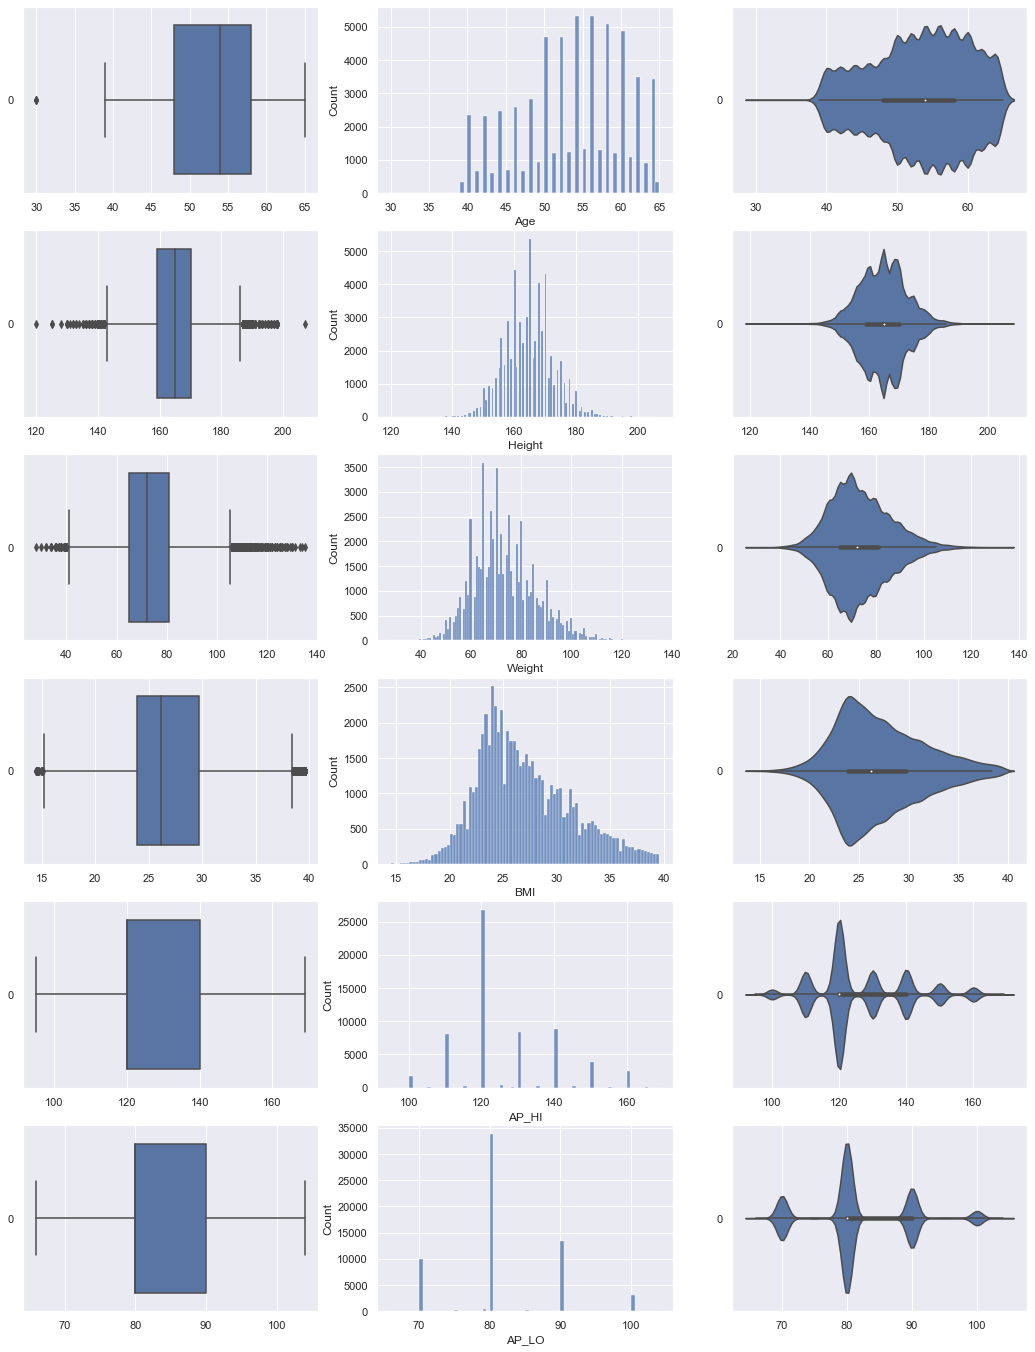

In [22]:
#visualization after cleaning box_whisker outlier
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in num_DF:
    sb.boxplot(data = num_DF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = num_DF[var], ax = axes[count,1])
    sb.violinplot(data = num_DF[var], orient = "h", ax = axes[count,2])
    count += 1

# Using Pairplot to detect and remove multi-variate outliers.

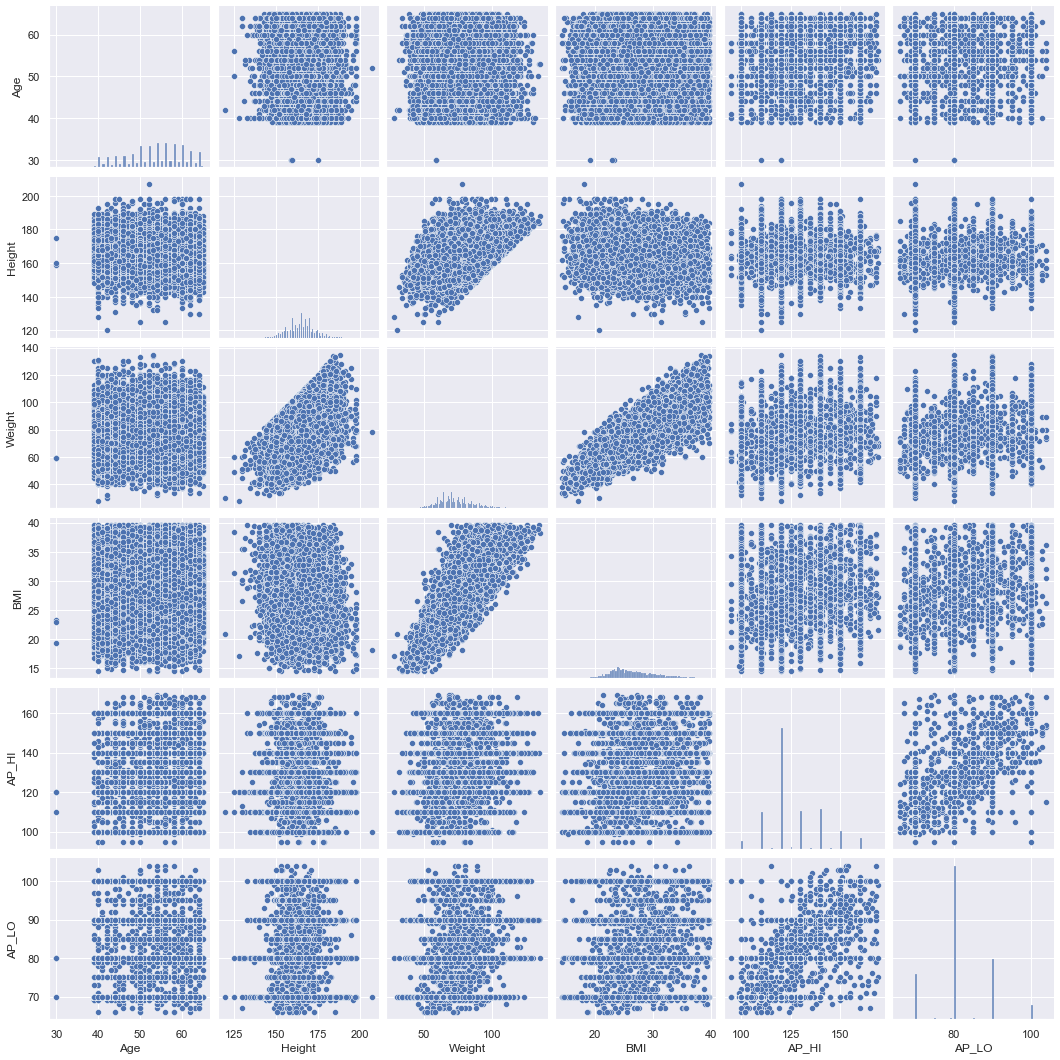

In [23]:
# Extract the Features from the Data
X = num_DF

# Plot the Raw Data on 2D grids
sb.pairplot(X)

In [24]:
# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(contamination=0.05)

<AxesSubplot:xlabel='Anomaly', ylabel='count'>

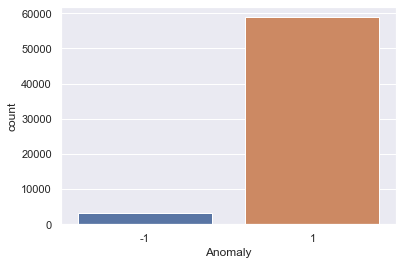

In [25]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = cardio_clean.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x = X_labeled["Anomaly"])

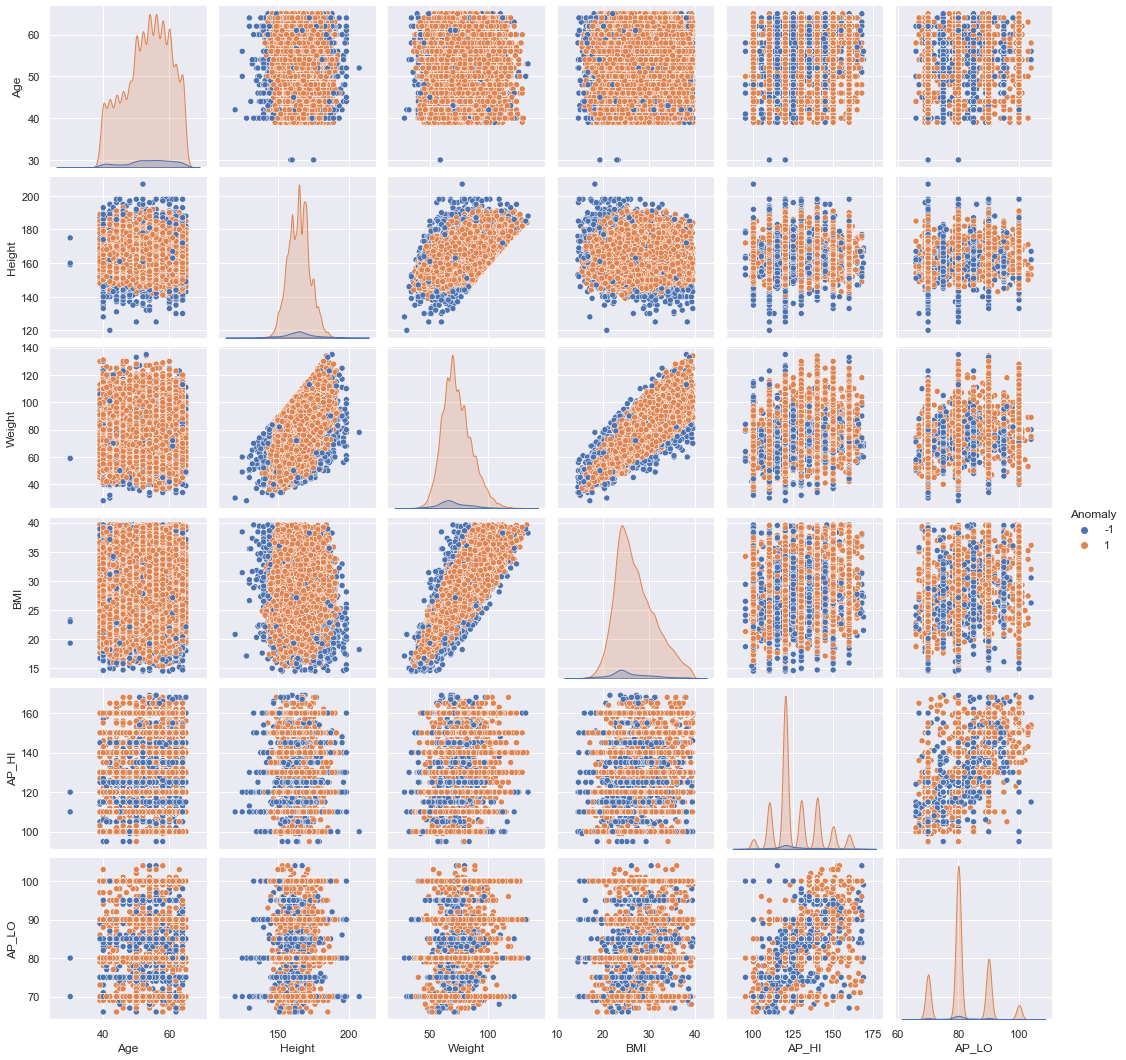

In [26]:
# Visualize the Anomalies in the Data
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Anomaly")

In [27]:
X_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61979 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       61979 non-null  int64   
 1   Age      61979 non-null  int64   
 2   Gender   61979 non-null  object  
 3   Height   61979 non-null  int64   
 4   Weight   61979 non-null  float64 
 5   BMI      61979 non-null  float64 
 6   AP_HI    61979 non-null  int64   
 7   AP_LO    61979 non-null  int64   
 8   Chol     61979 non-null  object  
 9   Gluc     61979 non-null  object  
 10  Smoke    61979 non-null  int64   
 11  Alco     61979 non-null  int64   
 12  Active   61979 non-null  int64   
 13  Cardio   61979 non-null  int64   
 14  Anomaly  61979 non-null  category
dtypes: category(1), float64(2), int64(9), object(3)
memory usage: 9.2+ MB


In [28]:
#drop anomaly from LOF
cardio_clean2 = X_labeled.drop(X_labeled[X_labeled.Anomaly == -1].index)
cardio_clean2 = cardio_clean2.drop(['Anomaly'], axis = 1)
cardio_clean2 = cardio_clean2.reset_index(drop=True)
cardio_clean2

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,M,168,62.0,22.0,110,80,N,N,0,0,1,0
1,1,55,F,156,85.0,34.9,140,90,H,N,0,0,1,1
2,2,52,F,165,64.0,23.5,130,70,H,N,0,0,0,1
3,3,48,M,169,82.0,28.7,150,100,N,N,0,0,1,1
4,8,60,F,151,67.0,29.4,120,80,B,B,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58875,99988,56,F,159,72.0,28.5,130,90,B,B,0,0,1,0
58876,99991,54,F,172,70.0,23.7,130,90,N,N,0,0,1,1
58877,99992,58,F,165,80.0,29.4,150,80,N,N,0,0,1,1
58878,99993,53,M,168,76.0,26.9,120,80,N,N,1,0,1,0


In [29]:
#Extract the numeric data
num_DF2 = cardio_clean2[['Age', 'Height', 'Weight', 'BMI', 'AP_HI', 'AP_LO']]
num_DF2.info()
print()
print(num_DF2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58880 entries, 0 to 58879
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     58880 non-null  int64  
 1   Height  58880 non-null  int64  
 2   Weight  58880 non-null  float64
 3   BMI     58880 non-null  float64
 4   AP_HI   58880 non-null  int64  
 5   AP_LO   58880 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 2.7 MB

       Age  Height  Weight   BMI  AP_HI  AP_LO
0       50     168    62.0  22.0    110     80
1       55     156    85.0  34.9    140     90
2       52     165    64.0  23.5    130     70
3       48     169    82.0  28.7    150    100
4       60     151    67.0  29.4    120     80
...    ...     ...     ...   ...    ...    ...
58875   56     159    72.0  28.5    130     90
58876   54     172    70.0  23.7    130     90
58877   58     165    80.0  29.4    150     80
58878   53     168    76.0  26.9    120     80
58879   56     170    72.0  

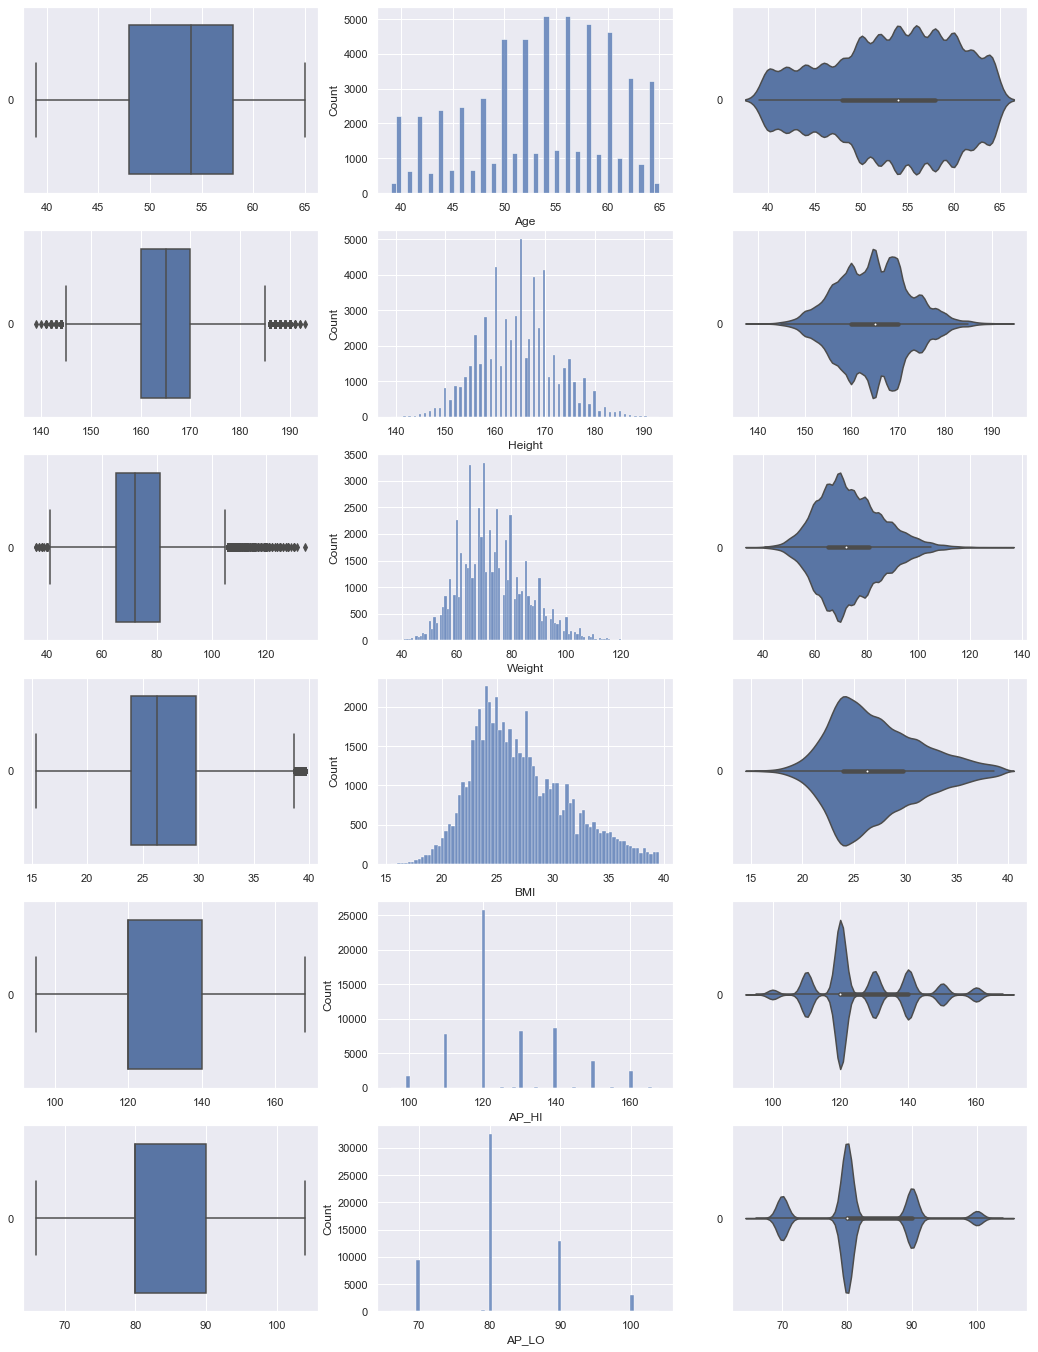

In [30]:
#vizualization after cleaning multi-variate
f, axes = mp.pyplot.subplots(6, 3, figsize=(18, 24))

count = 0
for var in num_DF2:
    sb.boxplot(data = num_DF2[var], orient = 'h', ax = axes[count,0])
    sb.histplot(data = num_DF2[var], ax = axes[count,1])
    sb.violinplot(data = num_DF2[var], orient = "h", ax = axes[count,2])
    count += 1

# EDA and Visualization ( After data cleaning )

In [31]:
print("Data type : ", type(cardio_clean2))
print("Data dims : ", cardio_clean2.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (58880, 14)


In [32]:
cardio_clean2.describe() 

,id,Age,Height,Weight,BMI,AP_HI,AP_LO,Smoke,Alco,Active,Cardio
count,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000
mean,49980.355791,53.359256,164.686515,73.356662,27.055937,126.172181,81.632812,0.088247,0.052395,0.804314,0.492527
std,28887.304599,6.730733,7.533438,12.468853,4.338007,13.717796,7.554915,0.283657,0.222824,0.396731,0.499948
min,0.000000,39.000000,139.000000,36.000000,15.400000,95.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,24908.000000,48.000000,160.000000,65.000000,23.900000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,50006.500000,54.000000,165.000000,72.000000,26.300000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,74956.250000,58.000000,170.000000,81.000000,29.800000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,193.000000,134.000000,39.600000,168.000000,104.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
cardio_clean2.corr()

,id,Age,Height,Weight,BMI,AP_HI,AP_LO,Smoke,Alco,Active,Cardio
id,1.000000,0.003629,-0.000447,0.001710,0.001584,0.007626,0.005169,-0.001678,-0.001084,0.003482,0.007967
Age,0.003629,1.000000,-0.099230,0.044941,0.107275,0.204592,0.146130,-0.050178,-0.029957,-0.009131,0.236071
Height,-0.000447,-0.099230,1.000000,0.386530,-0.168137,0.005713,0.022081,0.191838,0.097132,-0.012610,-0.017735
Weight,0.001710,0.044941,0.386530,1.000000,0.840216,0.233602,0.214466,0.084007,0.073743,-0.011290,0.157358
BMI,0.001584,0.107275,-0.168137,0.840216,1.000000,0.245231,0.215227,-0.023604,0.020750,-0.005240,0.177888
AP_HI,0.007626,0.204592,0.005713,0.233602,0.245231,1.000000,0.715582,0.026199,0.029737,0.003242,0.432799
AP_LO,0.005169,0.146130,0.022081,0.214466,0.215227,0.715582,1.000000,0.023387,0.032575,-0.000327,0.335687
Smoke,-0.001678,-0.050178,0.191838,0.084007,-0.023604,0.026199,0.023387,1.000000,0.344691,0.023964,-0.018105
Alco,-0.001084,-0.029957,0.097132,0.073743,0.020750,0.029737,0.032575,0.344691,1.000000,0.025878,-0.010283
Active,0.003482,-0.009131,-0.012610,-0.011290,-0.005240,0.003242,-0.000327,0.023964,0.025878,1.000000,-0.036572


In [34]:
cardio_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58880 entries, 0 to 58879
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      58880 non-null  int64  
 1   Age     58880 non-null  int64  
 2   Gender  58880 non-null  object 
 3   Height  58880 non-null  int64  
 4   Weight  58880 non-null  float64
 5   BMI     58880 non-null  float64
 6   AP_HI   58880 non-null  int64  
 7   AP_LO   58880 non-null  int64  
 8   Chol    58880 non-null  object 
 9   Gluc    58880 non-null  object 
 10  Smoke   58880 non-null  int64  
 11  Alco    58880 non-null  int64  
 12  Active  58880 non-null  int64  
 13  Cardio  58880 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 6.3+ MB


## Numeric variables EDA and visulization ( After cleaning )

In [35]:
# get all cleaned numeric data
num_DF = pd.DataFrame(cardio_clean2[['Age', 'Height', 'Weight', 'BMI', 'AP_HI', 'AP_LO']])
num_DF.head()

,Age,Height,Weight,BMI,AP_HI,AP_LO
0,50,168,62.0,22.0,110,80
1,55,156,85.0,34.9,140,90
2,52,165,64.0,23.5,130,70
3,48,169,82.0,28.7,150,100
4,60,151,67.0,29.4,120,80


In [36]:
num_DF.describe()

,Age,Height,Weight,BMI,AP_HI,AP_LO
count,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000
mean,53.359256,164.686515,73.356662,27.055937,126.172181,81.632812
std,6.730733,7.533438,12.468853,4.338007,13.717796,7.554915
min,39.000000,139.000000,36.000000,15.400000,95.000000,66.000000
25%,48.000000,160.000000,65.000000,23.900000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,26.300000,120.000000,80.000000
75%,58.000000,170.000000,81.000000,29.800000,140.000000,90.000000
max,65.000000,193.000000,134.000000,39.600000,168.000000,104.000000


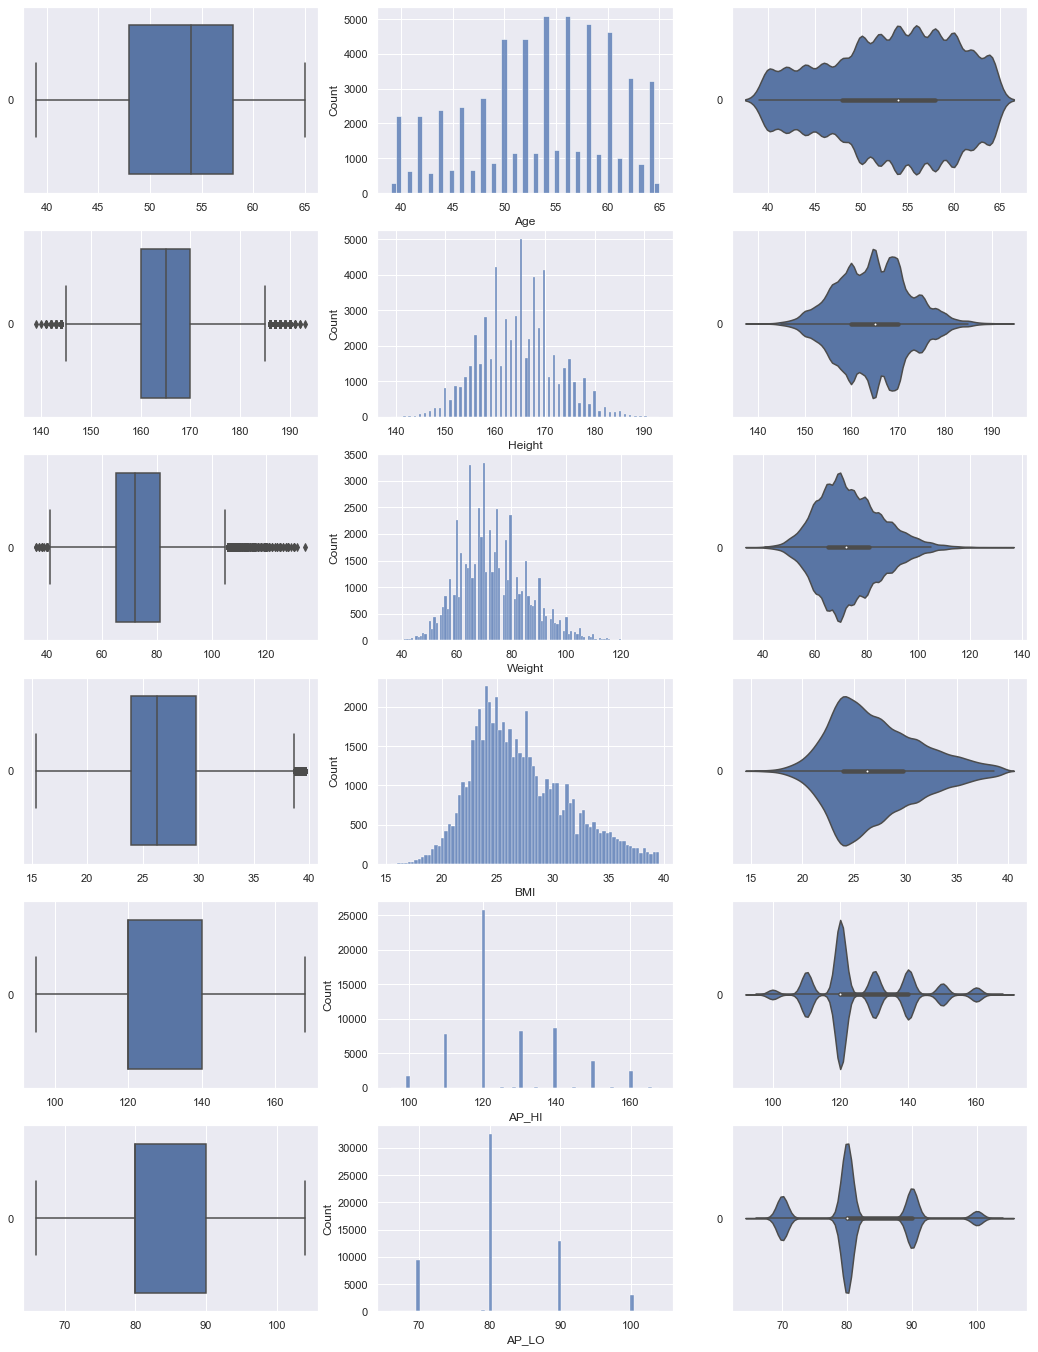

In [37]:
#visualization before data cleaning
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in num_DF:
    sb.boxplot(data = num_DF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = num_DF[var], ax = axes[count,1])
    sb.violinplot(data = num_DF[var], orient = "h", ax = axes[count,2])
    count += 1

<AxesSubplot:>

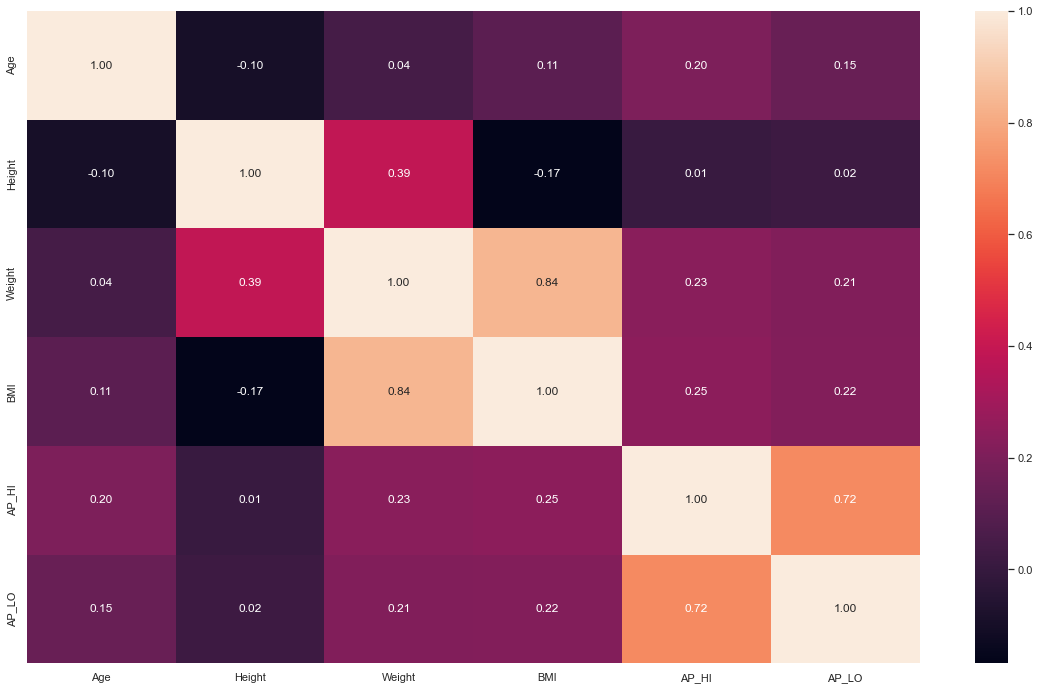

In [38]:
f = plt.figure(figsize=(20, 12))
sb.heatmap(num_DF.corr(), annot = True, fmt = ".2f")

In [39]:
num_DF.corr()

,Age,Height,Weight,BMI,AP_HI,AP_LO
Age,1.000000,-0.099230,0.044941,0.107275,0.204592,0.146130
Height,-0.099230,1.000000,0.386530,-0.168137,0.005713,0.022081
Weight,0.044941,0.386530,1.000000,0.840216,0.233602,0.214466
BMI,0.107275,-0.168137,0.840216,1.000000,0.245231,0.215227
AP_HI,0.204592,0.005713,0.233602,0.245231,1.000000,0.715582
AP_LO,0.146130,0.022081,0.214466,0.215227,0.715582,1.000000


In [40]:
num_DF.skew()

Age      -0.304667
Height    0.121072
Weight    0.533646
BMI       0.599513
AP_HI     0.690161
AP_LO     0.450630
dtype: float64

## Categorical variables EDA and Visualization ( After cleaning )

In [41]:
# categorical columns
cat_DF = pd.DataFrame(cardio_clean2[['Gender', 'Chol', 'Gluc', 'Smoke', 'Alco', 'Active', 'Cardio']])
cat_DF.head()

,Gender,Chol,Gluc,Smoke,Alco,Active,Cardio
0,M,N,N,0,0,1,0
1,F,H,N,0,0,1,1
2,F,H,N,0,0,0,1
3,M,N,N,0,0,1,1
4,F,B,B,0,0,0,0


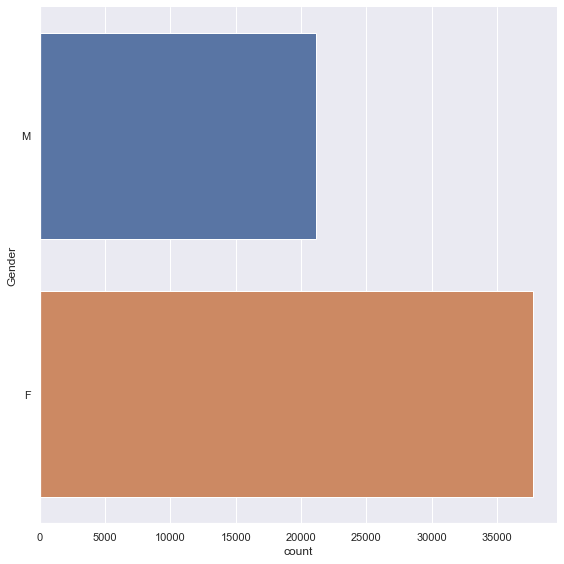

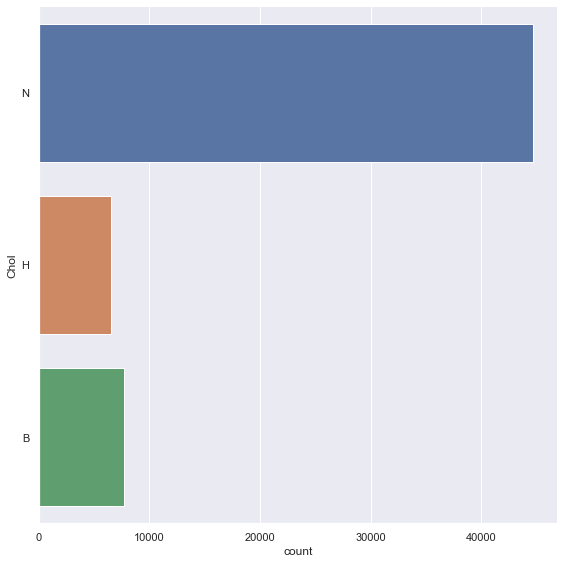

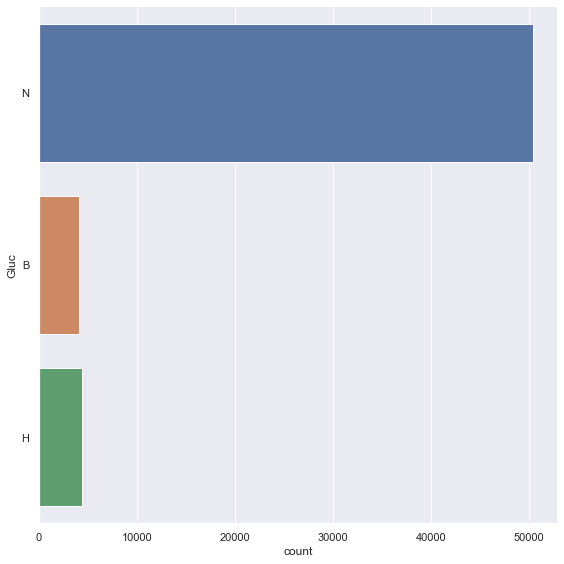

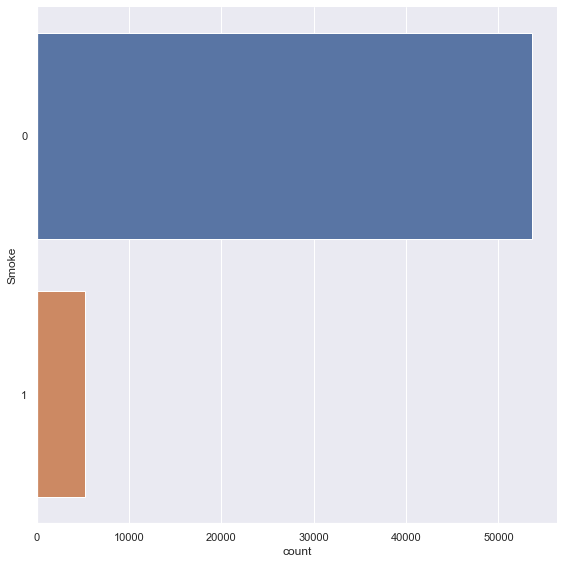

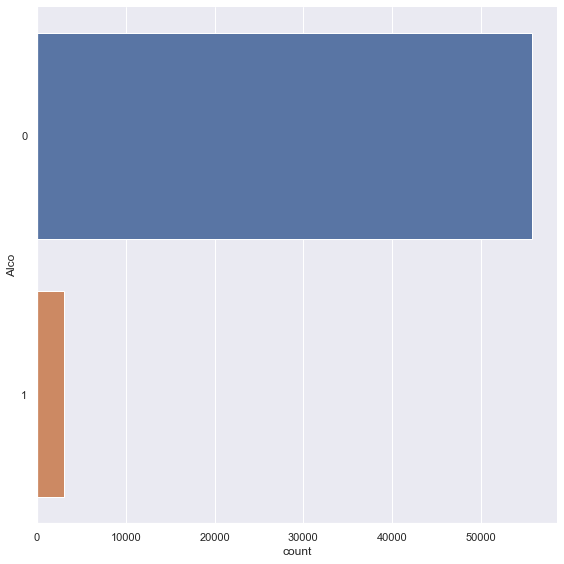

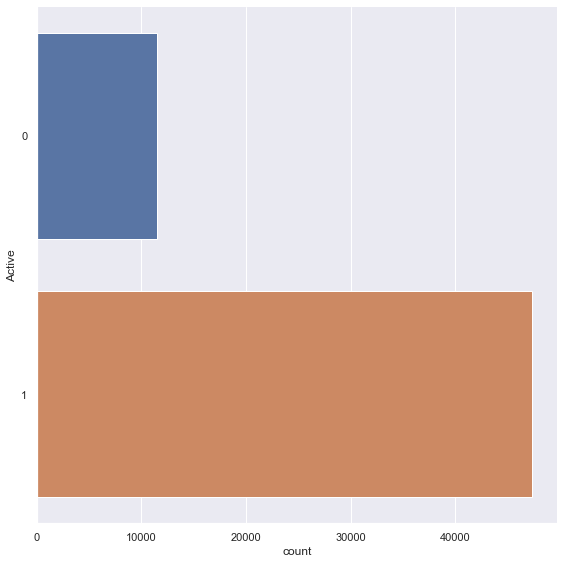

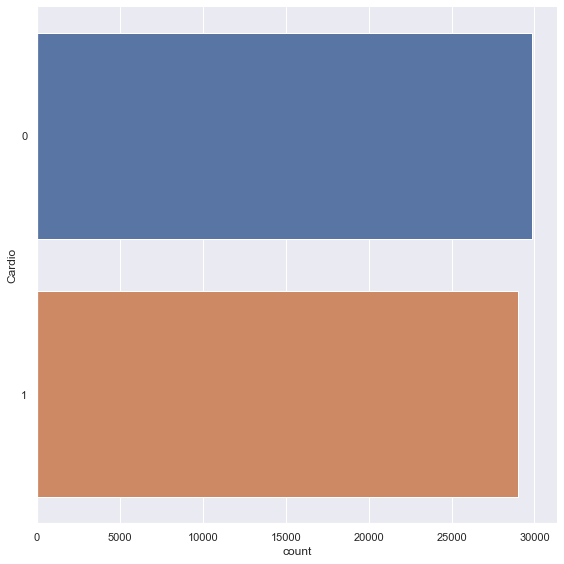

In [42]:
# cat plots
for var in cat_DF:
    sb.catplot(y = var, data = cat_DF, kind = "count", height = 8)

In [43]:
#change categorical to numeric

cat_DF['Chol']=cat_DF['Chol'].replace(['N','B','H'],[0,1,2]) 
cat_DF['Gluc']=cat_DF['Gluc'].replace(['N','B','H'],[0,1,2])
cat_DF['Gender']=cat_DF['Gender'].replace(['M','F'],[0,1])

<AxesSubplot:>

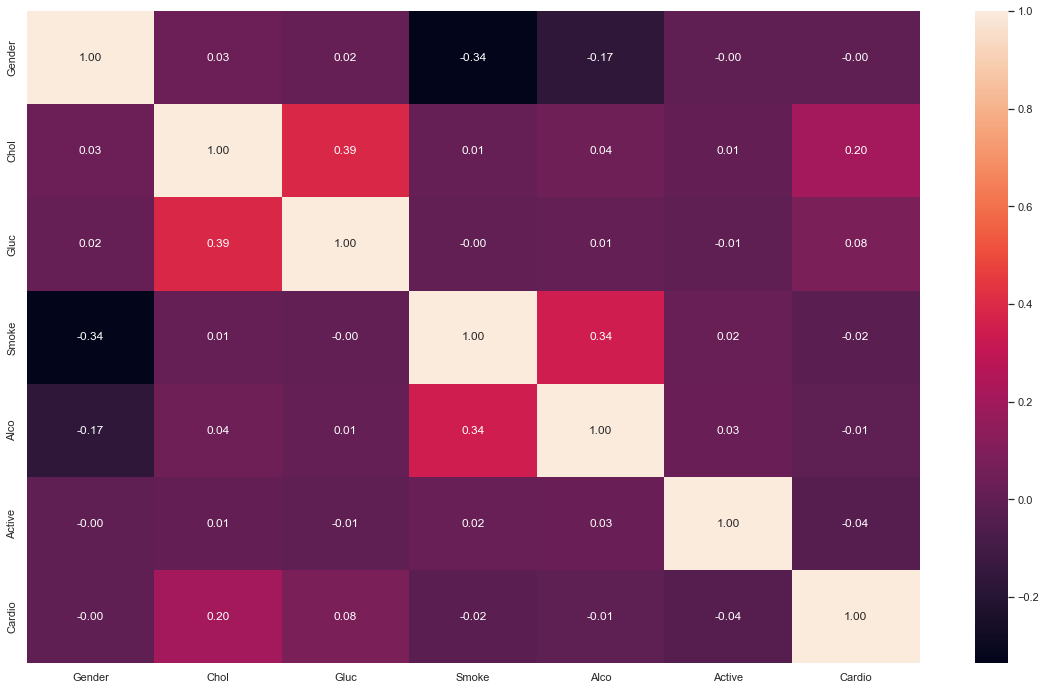

In [44]:
# using phi coefficient ( for categorical variables )
#heatmap for kendall corr for categorical 
variablesf = mp.pyplot.figure(figsize=(20, 12))
sb.heatmap(cat_DF.corr(method='kendall'), annot = True, fmt = ".2f")

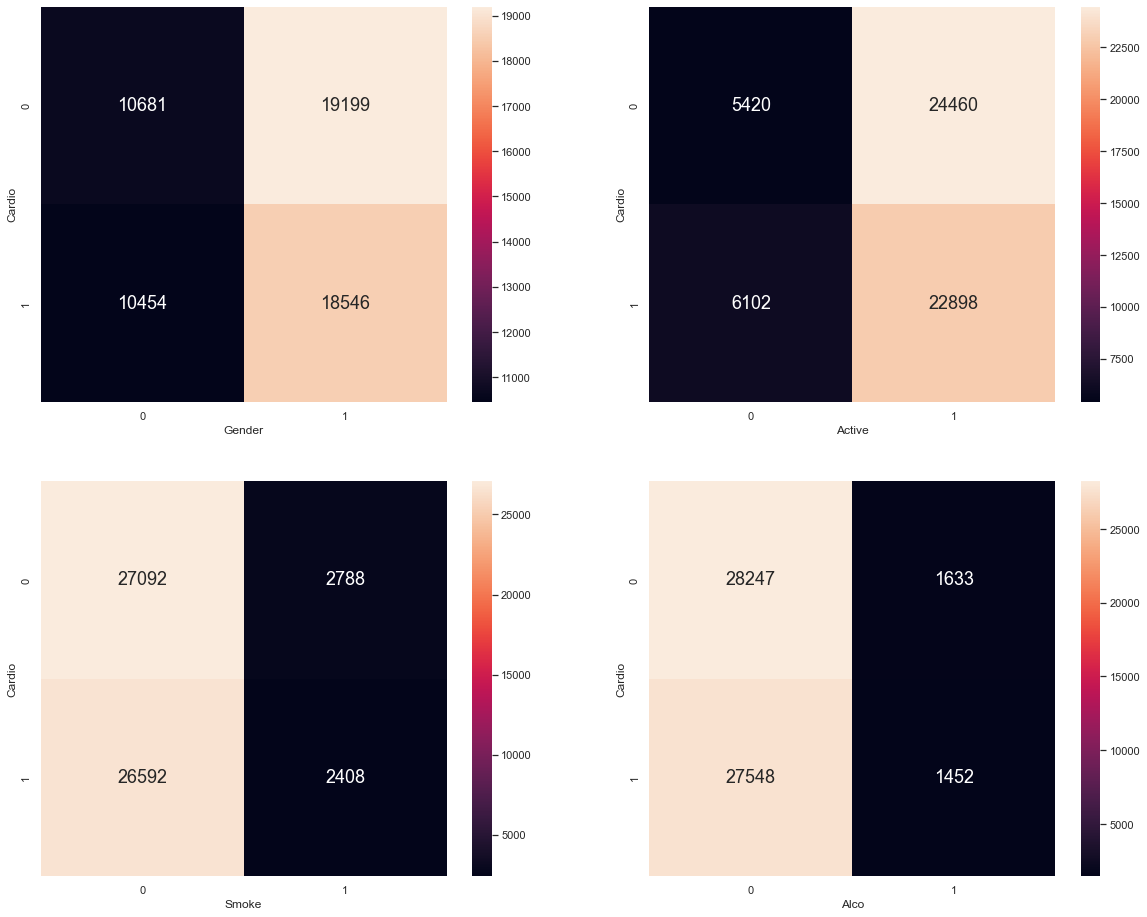

In [45]:
# looking at the binary variables distribution
f, axes = mp.pyplot.subplots(2, 2, figsize=(20, 16), )

cm_gender = confusion_matrix(cat_DF["Cardio"], cat_DF["Gender"])
cm_smoke = confusion_matrix(cat_DF["Cardio"], cat_DF["Smoke"])
cm_alco = confusion_matrix(cat_DF["Cardio"], cat_DF["Alco"])
cm_active = confusion_matrix(cat_DF["Cardio"], cat_DF["Active"])

sb.heatmap(cm_gender, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][0])
sb.heatmap(cm_active, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][1])
sb.heatmap(cm_smoke, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][0])
sb.heatmap(cm_alco, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][1])

count = 0
for ax in axes.flat:
    ax.set(ylabel = 'Cardio')
    if count == 0:
        ax.set(xlabel = 'Gender')
    elif count == 1:
        ax.set(xlabel = 'Active')
    elif count == 2:
        ax.set(xlabel = 'Smoke')
    elif count == 3:
        ax.set(xlabel = 'Alco')   
    count+=1

In [46]:
print("Percentage of Male with Cardio disease: ", round(100 * cm_gender[1][0]/(cm_gender[0][0] + cm_gender[1][0]),1))
print("Percentage of Female with Cardio disease: ", round(100 * cm_gender[1][1]/(cm_gender[0][1] + cm_gender[1][1]),1))
print("Percentage of non-Active with Cardio disease: ", round(100 * cm_active[1][0]/(cm_active[0][0] + cm_active[1][0]),1))
print("Percentage of Active with Cardio disease: ", round(100 * cm_active[1][1]/(cm_active[0][1] + cm_active[1][1]),1))
print("Percentage of non-Smoker with Cardio disease: ", round(100 * cm_smoke[1][0]/(cm_smoke[0][0] + cm_smoke[1][0]),1))
print("Percentage of Smoker with Cardio disease: ", round(100 * cm_smoke[1][1]/(cm_smoke[0][1] + cm_smoke[1][1]),1))
print("Percentage of non-Alcohol with Cardio disease: ", round(100 * cm_alco[1][0]/(cm_alco[0][0] + cm_alco[1][0]),1))
print("Percentage of Alcohol with Cardio disease: ", round(100 * cm_alco[1][1]/(cm_alco[0][1] + cm_alco[1][1]),1))

Percentage of Male with Cardio disease:  49.5
Percentage of Female with Cardio disease:  49.1
Percentage of non-Active with Cardio disease:  53.0
Percentage of Active with Cardio disease:  48.4
Percentage of non-Smoker with Cardio disease:  49.5
Percentage of Smoker with Cardio disease:  46.3
Percentage of non-Alcohol with Cardio disease:  49.4
Percentage of Alcohol with Cardio disease:  47.1


# Machine learning models

In [47]:
cardio_clean2.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,M,168,62.0,22.0,110,80,N,N,0,0,1,0
1,1,55,F,156,85.0,34.9,140,90,H,N,0,0,1,1
2,2,52,F,165,64.0,23.5,130,70,H,N,0,0,0,1
3,3,48,M,169,82.0,28.7,150,100,N,N,0,0,1,1
4,8,60,F,151,67.0,29.4,120,80,B,B,0,0,0,0


In [48]:
cardio_clean2.isnull().sum()

id        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
AP_HI     0
AP_LO     0
Chol      0
Gluc      0
Smoke     0
Alco      0
Active    0
Cardio    0
dtype: int64

## Logistic Regression

In [49]:
# Extract Response and Predictors
y = pd.DataFrame(cardio_clean2["Cardio"])
X = pd.DataFrame(cardio_clean2[['Age', 'Height', 'Weight', 'BMI', 'AP_HI', 'AP_LO']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Linear Regression using Train Data
logreg = LogisticRegression()      
logreg.fit(X_train, y_train.values.ravel())

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', logreg.intercept_)
print('Coefficients of Regression \t: a = ', logreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, logreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# cannot uses f, axes = plt.subplots(6, 1, figsize=(24, 12)) 
# because 'AxesSubplot' object has no attribute 'regplot'
# sb.regplot(x=X_train, y=y_train, data=num_DF, logistic=True, ci=None) cmi cause x input is 1D array
# logistric=True because y is a binary variable
#sb.regplot(x=X_train['Age'], y=y_train, data=num_DF, logistic=True, ci=None)
# sb.regplot(x=X_test['Age'], y=y_test, data=num_DF, logistic=True, ci=None)

Intercept of Regression 	: b =  [-0.00494461]
Coefficients of Regression 	: a =  [[ 0.05504258 -0.08146667  0.09046663 -0.20684162  0.0650228   0.01521055]]

  Predictors  Coefficients
0        Age      0.055043
1     Height     -0.081467
2     Weight      0.090467
3        BMI     -0.206842
4      AP_HI      0.065023
5      AP_LO      0.015211



<AxesSubplot:xlabel='Age', ylabel='Cardio'>

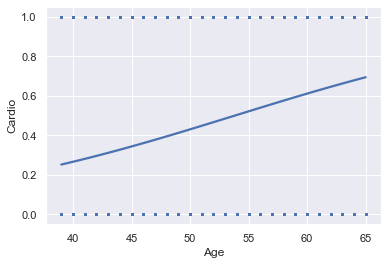

In [50]:
sb.regplot(x=X_test['Age'], y=y_test, data=num_DF, logistic=True, ci=None, scatter_kws={'s':2})

<AxesSubplot:xlabel='Height', ylabel='Cardio'>

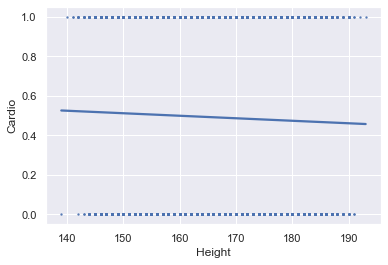

In [51]:
sb.regplot(x=X_train['Height'], y=y_train, data=num_DF, logistic=True, ci=None, scatter_kws={'s':2})

<AxesSubplot:xlabel='Weight', ylabel='Cardio'>

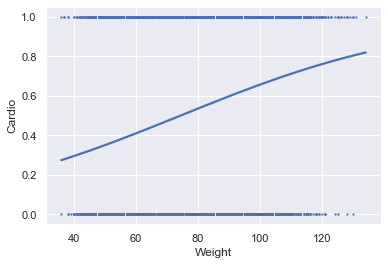

In [52]:
sb.regplot(x=X_train['Weight'], y=y_train, data=num_DF, logistic=True, ci=None, scatter_kws={'s':2})

<AxesSubplot:xlabel='BMI', ylabel='Cardio'>

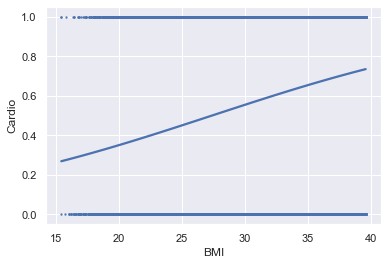

In [53]:
sb.regplot(x=X_train['BMI'], y=y_train, data=num_DF, logistic=True, ci=None, scatter_kws={'s':2})

<AxesSubplot:xlabel='AP_HI', ylabel='Cardio'>

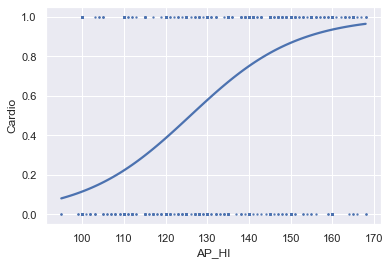

In [54]:
sb.regplot(x=X_train['AP_HI'], y=y_train, data=num_DF, logistic=True, ci=None, scatter_kws={'s':2})

<AxesSubplot:xlabel='AP_LO', ylabel='Cardio'>

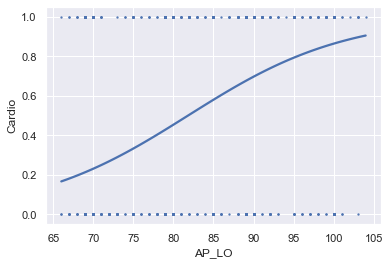

In [55]:
sb.regplot(x=X_train['AP_LO'], y=y_train, data=num_DF, logistic=True, ci=None, scatter_kws={'s':2})

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7128170289855073
Mean Squared Error (MSE) 	: 0.28718297101449275
Matthews corrcoef  (MCC) 	: 0.42788447655754497
test accuracy : 0.7128170289855073

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7160326086956522
Mean Squared Error (MSE) 	: 0.28396739130434784
Matthews corrcoef  (MCC) 	: 0.43465450738324934
test accuracy : 0.7160326086956522



<AxesSubplot:>

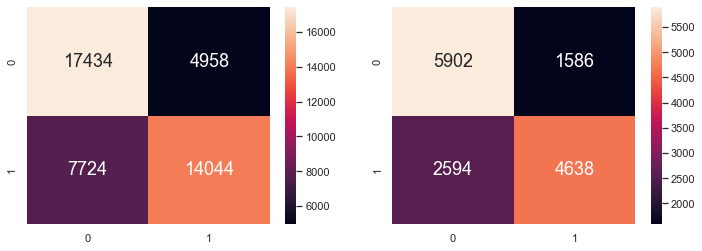

In [56]:
# Training set performance
log_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
log_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
log_train_as = accuracy_score(y_train,y_train_pred)
log_test_as = accuracy_score(y_test,y_test_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Matthews corrcoef  (MCC) \t:", log_train_mcc)
print('test accuracy :', log_train_as)
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Matthews corrcoef  (MCC) \t:", log_test_mcc)
print('test accuracy :', log_test_as)
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Random Forest

In [57]:
#change categorical to numeric

cardio_clean2['Chol']=cardio_clean2['Chol'].replace(['N','B','H'],[0,1,2]) 
cardio_clean2['Gluc']=cardio_clean2['Gluc'].replace(['N','B','H'],[0,1,2])
cardio_clean2['Gender']=cardio_clean2['Gender'].replace(['M','F'],[0,1])
cardio_clean2.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,0,168,62.0,22.0,110,80,0,0,0,0,1,0
1,1,55,1,156,85.0,34.9,140,90,2,0,0,0,1,1
2,2,52,1,165,64.0,23.5,130,70,2,0,0,0,0,1
3,3,48,0,169,82.0,28.7,150,100,0,0,0,0,1,1
4,8,60,1,151,67.0,29.4,120,80,1,1,0,0,0,0


In [58]:
y =cardio_clean2['Cardio']
x =cardio_clean2.drop(['Cardio'],axis=1)
x =x.drop(['id'],axis=1)

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25, random_state=42)

train Classification report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75     22392
           1       0.77      0.64      0.70     21768

    accuracy                           0.73     44160
   macro avg       0.73      0.72      0.72     44160
weighted avg       0.73      0.73      0.72     44160

Matthews corrcoef  (MCC) 	: 0.4560316987749058
train accuracy: 0.7254528985507246

test Classification report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.75      7488
           1       0.77      0.63      0.69      7232

    accuracy                           0.73     14720
   macro avg       0.73      0.72      0.72     14720
weighted avg       0.73      0.73      0.72     14720

Matthews corrcoef  (MCC) 	: 0.4559683707590428
test accuracy : 0.7253396739130434



<AxesSubplot:>

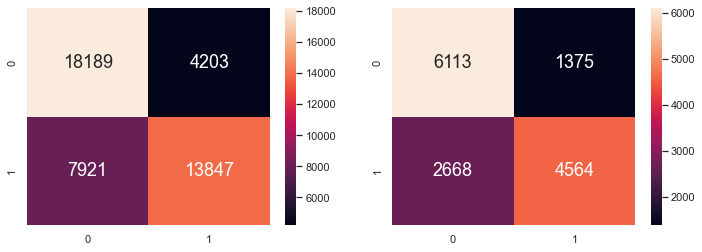

In [60]:
#n_estimators = number of trees used, 
#these two parameters keep the test accuracy around the same level while reducing overfitting

rf_Model=RandomForestClassifier(n_estimators=50,max_depth=6)#,bootstrap=False) 
rf_Model.fit(x_train,y_train)
y_train_pred=rf_Model.predict(x_train)
y_test_pred=rf_Model.predict(x_test)
rf_Model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_Model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_Model_train_as = accuracy_score(y_train,y_train_pred)
rf_Model_test_as = accuracy_score(y_test,y_test_pred)

# Check the Goodness of Fit (on Train Data)
print('train Classification report:\n',classification_report(y_train,y_train_pred))
print("Matthews corrcoef  (MCC) \t:", rf_Model_train_mcc)
print('train accuracy:', rf_Model_train_as)
print()

# Check the Goodness of Fit (on Test Data)
print('test Classification report:\n',classification_report(y_test,y_test_pred))
print("Matthews corrcoef  (MCC) \t:", rf_Model_test_mcc)
print('test accuracy :', rf_Model_test_as)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### To increase the accuracy of random forest, we will be using Area Under Curve (AUC) score to determine the optimal parameter tuning

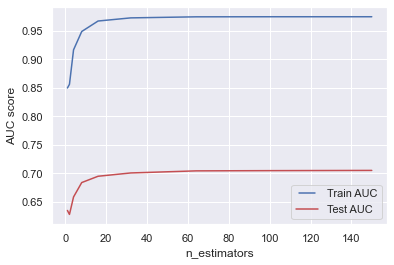

In [61]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 150]
train_results = []
test_results = []

for estimator in n_estimators:
    
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

We observe that for n_estimator = 60 increase in n_estimators does not increase the AUC score further.

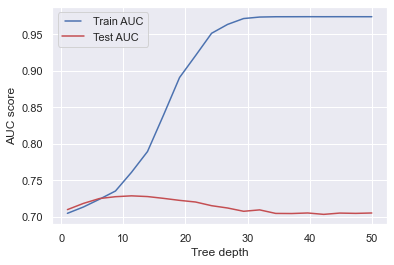

In [62]:
max_depths = np.linspace(1, 50, 20, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

We observe that for Tree depth = 35 increase in depth does not increase the AUC score further.

train Classification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     22392
           1       0.98      0.96      0.97     21768

    accuracy                           0.97     44160
   macro avg       0.97      0.97      0.97     44160
weighted avg       0.97      0.97      0.97     44160

Matthews corrcoef  (MCC) 	: 0.9489719119944365
train accuracy: 0.974411231884058

test Classification report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71      7488
           1       0.70      0.69      0.69      7232

    accuracy                           0.70     14720
   macro avg       0.70      0.70      0.70     14720
weighted avg       0.70      0.70      0.70     14720

Matthews corrcoef  (MCC) 	: 0.40349475379434996
test accuracy : 0.7019021739130434



<AxesSubplot:>

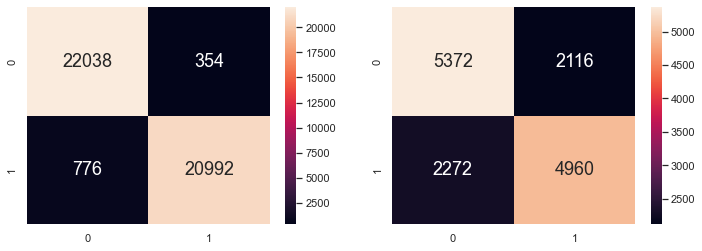

In [63]:
#n_estimators = number of trees used, 
#these two parameters keep the test accuracy around the same level while reducing overfitting

rf_Model=RandomForestClassifier(n_estimators=60,max_depth=35,bootstrap=True) 
rf_Model.fit(x_train,y_train)
y_train_pred=rf_Model.predict(x_train)
y_test_pred=rf_Model.predict(x_test)
rf_Model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_Model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_Model_train_as = accuracy_score(y_train,y_train_pred)
rf_Model_test_as = accuracy_score(y_test,y_test_pred)

# Check the Goodness of Fit (on Train Data)
print('train Classification report:\n',classification_report(y_train,y_train_pred))
print("Matthews corrcoef  (MCC) \t:", rf_Model_train_mcc)
print('train accuracy:', rf_Model_train_as)
print()

# Check the Goodness of Fit (on Test Data)
print('test Classification report:\n',classification_report(y_test,y_test_pred))
print("Matthews corrcoef  (MCC) \t:", rf_Model_test_mcc)
print('test accuracy :', rf_Model_test_as)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Neural Network

In [64]:
#press stop if accidentally ran
# Finding best hyper parameter for neural network for dataset with outliers

MLP = MLPClassifier(max_iter=500)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (10,10,10), (30,30,30),(20,20,20),(40,40,40),(100,100,100),(10,10),(20,20),(30,30),(40,40),(50,50)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
}
clf = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
0.696 (+/-0.037) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'sgd'}
0.721 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
0.639 (+/-0.187) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'sgd'}
0.720 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}
0.636 (+/-0.183) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 30, 30), 'solver': 'sgd'}
0.700 (+/-0.042) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 30, 30), 'solver': 'adam'}
0.639 (+/-0.187) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20, 20), 'solver': 'sgd'}
0.719 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_si

With outliers neural network
train Classification report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72     22392
           1       0.71      0.73      0.72     21768

    accuracy                           0.72     44160
   macro avg       0.72      0.72      0.72     44160
weighted avg       0.72      0.72      0.72     44160

Matthews corrcoef  (MCC) 	: 0.4435576170930742
train accuracy: 0.7215806159420289

test Classification report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      7488
           1       0.71      0.73      0.72      7232

    accuracy                           0.72     14720
   macro avg       0.72      0.72      0.72     14720
weighted avg       0.72      0.72      0.72     14720

Matthews corrcoef  (MCC) 	: 0.44854394917198953
test accuracy : 0.7241847826086957



<AxesSubplot:>

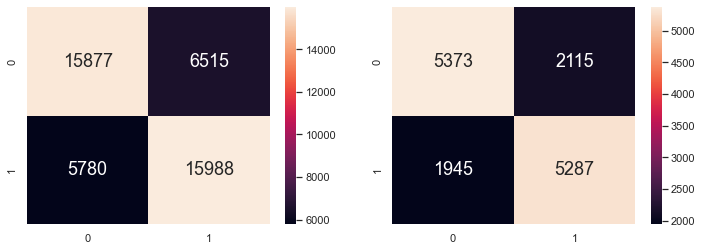

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’ // identity bad //30,30,30 1000 logistic gives 0.731
#solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
#alphafloat, default=0.0001
#best para found {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20), 'solver': 'adam'}

MLP=MLPClassifier(hidden_layer_sizes=(20,20),max_iter=500,activation='logistic') 
MLP.fit(x_train,y_train.values.ravel())
y_train_pred=MLP.predict(x_train)
y_test_pred=MLP.predict(x_test)
MLP_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
MLP_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
MLP_train_as = accuracy_score(y_train,y_train_pred)
MLP_test_as = accuracy_score(y_test,y_test_pred)

print('With outliers neural network')
print('train Classification report:\n',classification_report(y_train,y_train_pred))
print("Matthews corrcoef  (MCC) \t:", MLP_train_mcc)
print('train accuracy:', MLP_train_as)
print()

print('test Classification report:\n',classification_report(y_test,y_test_pred))
print("Matthews corrcoef  (MCC) \t:", MLP_test_mcc)
print('test accuracy :', MLP_test_as)
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Stacking Ensemble

In [66]:
estimator_list = [
    ('logreg', logreg),
    ('rf_Model',rf_Model),
    ('MLP', MLP)]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 0.7225090579710145
- MCC: 0.44483813409890083
- F1 score: 0.7224531554929533
----------------------------------
Model performance for Test set
- Accuracy: 0.7182744565217392
- MCC: 0.4362706251715452
- F1 score: 0.7181650030581895


# Results

In [67]:
acc_train_list = {'logreg':log_train_as,
'rf_Model': rf_Model_train_as,
'MLP': MLP_train_as,
'Ensem': stack_model_train_accuracy}

mcc_train_list = {'logreg':log_train_mcc,
'rf_Model': rf_Model_train_mcc,
'MLP': MLP_train_mcc,
'Ensem': stack_model_train_mcc}

In [68]:
acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
df = pd.concat([acc_df, mcc_df], axis=1)
df

,Accuracy,MCC
logreg,0.712817,0.427884
rf_Model,0.974411,0.948972
MLP,0.721581,0.443558
Ensem,0.722509,0.444838
